In [3]:
from bs4 import BeautifulSoup
import requests

In [4]:
import numpy as np
import pandas as pd

## Toronto Postcode list from Wiki

In [5]:
source = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M").text

In [6]:
soup = BeautifulSoup(source,'lxml')

In [7]:
container = soup.find('div',class_='mw-content-ltr')
#find class containing postcode table tags
tables = container.find('table',class_='wikitable sortable')

In [8]:
#Derive and store tag values
data = [[]]
cnt = 0
rows=tables.findAll("tr")
for row in rows:
    cnt = cnt + 1
    cells = row.findAll(["td","th"])
    final = []
    for j in range(len(cells)):
        cell = cells[j]
        txt = cell.text.rstrip()
        final.append(txt)
    if 'Not assigned' in final[1]:
        final=[]
    data.insert(cnt,final)

In [9]:
#Remove empty lists
list2 = [x for x in data if x]

## Assign Borough values to Neighbourhood in case of Not assigned

In [10]:
columns = list2[0]
pcdf = pd.DataFrame(list2[1:])
pcdf.columns = columns
#Assign Borough values to Neighbourhood in case of Not assigned
pcdf.loc[pcdf['Neighbourhood'] == 'Not assigned', 'Neighbourhood'] = pcdf['Borough']

In [11]:
final_df = pd.DataFrame(pcdf.groupby(['Postcode','Borough'],as_index=False)['Neighbourhood'].apply(','.join)).reset_index()

In [12]:
final_df.columns = columns

In [13]:
geo_codes_df = pd.read_csv("Geospatial_Coordinates.csv")

In [14]:
merged_df = pd.merge(final_df,geo_codes_df,
                  how='inner', left_on=['Postcode'], right_on = ['Postal Code'])

In [15]:
df_t = merged_df.loc[merged_df['Borough'].isin(['Downtown Toronto'])].reset_index(drop=True)

## Crime Data

In [16]:
crimes_tdf = pd.read_csv("MCI_2014_to_2017.csv")

In [36]:
crimes_grp = crimes_tdf.groupby(['Neighbourhood']).size().reset_index(name='count')

In [34]:
crimes_max = crimes_tdf.groupby(['Neighbourhood']).max()

In [93]:
crimes_merged = pd.merge(crimes_grp,crimes_max,
                  how='inner', left_on=['Neighbourhood'], right_on = ['Neighbourhood'])

In [18]:
crime_df2 = crimes_tdf.loc[crimes_tdf['Neighbourhood'] == 'Bendale (127)']

In [25]:
crime_df2 = crime_df2.iloc[0:5, :]

In [17]:
crime_merged_df = pd.merge(crimes_tdf,pcdf,
                  how='inner', left_on=['Neighbourhood'], right_on = ['Neighbourhood'])

In [19]:
crime_df = crimes_tdf['Neighbourhood'].value_counts().reset_index()

In [20]:
crime_df.columns = ['Neighbourhood','Count']
crime_df1 = pd.DataFrame(crime_df)
crime_df2 = crime_df1.loc[crime_df1['Neighbourhood'] == 'Bendale (127)']

In [100]:
crimes_merged.sort_values(['count'],ascending=False)

,Neighbourhood,count,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,...,occurrenceyear,occurrenceday,occurrencedayofyear,occurrencehour,MCI,Division,Hood_ID,Lat,Long,FID
23,Church-Yonge Corridor (75),4699,-79.372192,43.670162,131071,GO-2017999221,2017-12-31T05:00:00.000Z,2017-12-31T05:00:00.000Z,Outside,2135,...,2017.0,31.0,366.0,23,Theft Over,D52,75,43.670162,-79.372192,131071
122,Waterfront Communities-The Island (77),4362,-79.354797,43.653740,131065,GO-2017999653,2017-12-31T05:00:00.000Z,2017-12-31T05:00:00.000Z,Outside,2135,...,2017.0,31.0,366.0,23,Theft Over,D52,77,43.653740,-79.354797,131065
124,West Humber-Clairville (1),3282,-79.554672,43.757866,130996,GO-2017999144,2017-12-31T05:00:00.000Z,2017-12-31T05:00:00.000Z,Outside,2135,...,2017.0,31.0,365.0,23,Theft Over,D23,1,43.757866,-79.554672,130996
6,Bay Street Corridor (76),2744,-79.378822,43.668640,131070,GO-2017997738,2017-12-30T05:00:00.000Z,2017-12-30T05:00:00.000Z,Outside,2135,...,2017.0,31.0,366.0,23,Theft Over,D52,76,43.668640,-79.378822,131070
79,Moss Park (73),2653,-79.355804,43.662113,131066,GO-2017993784,2017-12-31T05:00:00.000Z,2017-12-31T05:00:00.000Z,Outside,2135,...,2017.0,31.0,366.0,23,Theft Over,D51,73,43.662113,-79.355804,131066
138,York University Heights (27),2538,-79.463386,43.787285,131019,GO-2017996316,2017-12-29T05:00:00.000Z,2017-12-29T05:00:00.000Z,Outside,2135,...,2017.0,31.0,366.0,23,Theft Over,D32,27,43.787285,-79.463386,131019
132,Woburn (137),2530,-79.204781,43.787025,130888,GO-2017994707,2017-12-31T05:00:00.000Z,2017-12-31T05:00:00.000Z,Outside,2135,...,2017.0,31.0,365.0,23,Theft Over,D43,137,43.787025,-79.204781,130968
62,Kensington-Chinatown (78),2440,-79.387512,43.658390,131035,GO-2017998831,2017-12-31T05:00:00.000Z,2017-12-31T05:00:00.000Z,Outside,2135,...,2017.0,31.0,366.0,23,Theft Over,D52,78,43.658390,-79.387512,131035
33,Downsview-Roding-CFB (26),2298,-79.458916,43.746387,130962,GO-2017999785,2017-12-31T05:00:00.000Z,2017-12-31T05:00:00.000Z,Outside,2135,...,2017.0,31.0,366.0,23,Theft Over,D32,26,43.746387,-79.458916,130999
3,Annex (95),2283,-79.388016,43.680065,131013,GO-2017999555,2017-12-29T05:00:00.000Z,2017-12-29T05:00:00.000Z,Outside,2135,...,2017.0,31.0,366.0,23,Theft Over,D53,95,43.680065,-79.388016,131013


## Plot Crime Data

In [101]:
from folium import plugins
import itertools


t_map = folium.Map(location = [43.679563, -79.377529], zoom_start = 12)

#crimes_merged = crimes_merged.iloc[0:5, :]

incidents = plugins.MarkerCluster().add_to(t_map)


for i in range(0,len(crimes_merged)):
    folium.Marker(
        location=[crimes_merged.iloc[i]['Y'], crimes_merged.iloc[i]['X']],
        icon=None,
        popup=label
        ).add_to(incidents)

t_map

In [1]:
import folium
from pandas.io.json import json_normalize

## Explore Areas in Toronto

In [22]:
map_toronto = folium.Map(location=[43.679563, -79.377529], zoom_start=10)

# add markers to map
for lat, lng, borough, neighbourhood in zip(df_t['Latitude'], df_t['Longitude'], df_t['Borough'], df_t['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7
        ).add_to(map_toronto) 
   
    
map_toronto

In [16]:
CLIENT_ID = 'Y3VXY10YN00C5HLQEPM3GZL4JLGZRN31YB1IAIBXYRDMORVQ' # your Foursquare ID
CLIENT_SECRET = 'D3LF5XOY4SGC0NHAVT3UWKUO55HK14GF5MVL2DXIXJKL0MST' # your Foursquare Secret
VERSION = '20181004' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Y3VXY10YN00C5HLQEPM3GZL4JLGZRN31YB1IAIBXYRDMORVQ
CLIENT_SECRET:D3LF5XOY4SGC0NHAVT3UWKUO55HK14GF5MVL2DXIXJKL0MST


Select the first Neighbour 

In [17]:
df_t.loc[0, 'Neighbourhood']

'Rosedale'

In [18]:
neighborhood_latitude = df_t.loc[0, 'Latitude'] # Rosedale latitude value
neighborhood_longitude = df_t.loc[0, 'Longitude'] # Rosedale longitude value

neighborhood_name = df_t.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Rosedale are 43.6795626, -79.37752940000001.


## Find Head Offices around Toronto

In [19]:
LIMIT = 100
radius = 1000
query = 'office'
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&query={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius,
    query,
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=Y3VXY10YN00C5HLQEPM3GZL4JLGZRN31YB1IAIBXYRDMORVQ&client_secret=D3LF5XOY4SGC0NHAVT3UWKUO55HK14GF5MVL2DXIXJKL0MST&v=20181004&ll=43.6795626,-79.37752940000001&radius=1000&query=office&limit=100'

In [20]:
results = requests.get(url).json()


In [21]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [22]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]



### Explore Neighbours

In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
       # print(name)
        query=' Head Office',
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&query={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            query,
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        try:
            venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        except:
            pass

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [24]:
Toronto_venues = getNearbyVenues(names=df_t['Neighbourhood'],
                                   latitudes=df_t['Latitude'],
                                   longitudes=df_t['Longitude']
                                  )

In [25]:
Toronto_venues

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rosedale,43.679563,-79.377529,Manulife Head Office,43.671414,-79.381546,Building
1,"Cabbagetown,St. James Town",43.667967,-79.367675,KFC Head Office,43.665979,-79.356324,Office
2,Church and Wellesley,43.665860,-79.383160,Holt Renfrew - Head Office,43.669895,-79.388892,Department Store
3,Church and Wellesley,43.665860,-79.383160,GAP Head Office,43.669986,-79.389167,Office
4,Church and Wellesley,43.665860,-79.383160,Manulife Head Office,43.671414,-79.381546,Building
5,Church and Wellesley,43.665860,-79.383160,Louis Vuitton Head Office,43.670053,-79.389568,Office
6,Church and Wellesley,43.665860,-79.383160,Artful Dodger,43.667692,-79.385081,Pub
7,"Ryerson,Garden District",43.657162,-79.378937,Sears Canada Head Office,43.655108,-79.380968,Office
8,"Ryerson,Garden District",43.657162,-79.378937,Flight Centre Toronto Head Office,43.655957,-79.382049,Office
9,"Ryerson,Garden District",43.657162,-79.378937,Hydro One Head Office,43.653822,-79.383091,Office


In [26]:
office_df = pd.DataFrame(Toronto_venues)

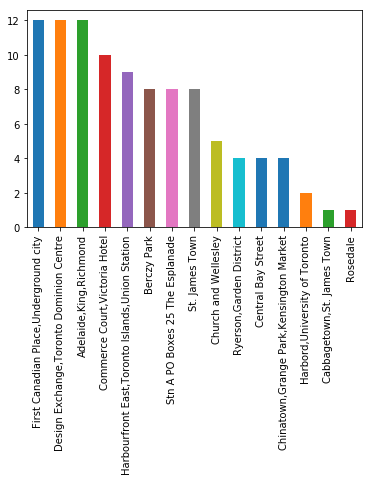

In [29]:
import matplotlib as matplot 
office_df["Neighbourhood"].value_counts().plot(kind="bar")


In [30]:
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighbourhood'] = Toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]


In [31]:
Toronto_grouped = Toronto_onehot.groupby('Neighbourhood').mean().reset_index()

In [32]:
num_top_venues = 3

for hood in Toronto_grouped['Neighbourhood']:
    temp = Toronto_grouped[Toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    

In [33]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [34]:
num_top_venues = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = Toronto_grouped['Neighbourhood']

for ind in np.arange(Toronto_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)



In [38]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 5

Toronto_grouped_clustering = Toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20] 

array([3, 3, 0, 0, 3, 4, 3, 3, 3, 2, 3, 1, 0, 0, 3])

In [39]:
Toronto_merged = df_t

# add clustering labels
#Toronto_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Toronto_merged = Toronto_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
Toronto_merged = Toronto_merged[Toronto_merged['1st Most Common Venue'].notnull()].reset_index()

Toronto_merged['Cluster Labels'] = kmeans.labels_



In [40]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[43.679563, -79.377529], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_merged['Latitude'], Toronto_merged['Longitude'], Toronto_merged['Neighbourhood'], Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [41]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 0, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Postcode,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Cluster Labels
2,M4Y,43.665860,-79.383160,Office,Pub,Department Store,0
3,M5B,43.657162,-79.378937,Office,Pub,Lounge,0
12,M5T,43.653206,-79.400049,Office,Building,Pub,0
13,M5W,43.646435,-79.374846,Office,Building,Pub,0


In [42]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 1, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Postcode,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Cluster Labels
11,M5S,43.662696,-79.400049,Office,Building,Pub,1


In [43]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 2, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Postcode,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Cluster Labels
9,M5K,43.647177,-79.381576,Office,Lounge,Building,2


In [44]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 3, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Postcode,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Cluster Labels
0,M4W,43.679563,-79.377529,Building,Pub,Office,3
1,M4X,43.667967,-79.367675,Office,Pub,Lounge,3
4,M5C,43.651494,-79.375418,Office,Pub,Lounge,3
6,M5G,43.657952,-79.387383,Office,Pub,Lounge,3
7,M5H,43.650571,-79.384568,Office,Lounge,Building,3
8,M5J,43.640816,-79.381752,Office,Lounge,Building,3
10,M5L,43.648198,-79.379817,Office,Building,Pub,3
14,M5X,43.648429,-79.382280,Office,Lounge,Building,3
